# **Project Name**    -Zomato Restaurant Data Analysis with Machine Learning and NLP for Rating Prediction & Sentiment Insights



##### **Project Type**    - Exploratory Data Analysis(EDA) + Regression and Unspuervised Learning
##### **Contribution**    - Individual Project

# **Project Summary -**

This project focuses on performing an end-to-end analysis and prediction of restaurant ratings using real-world data from the the Zomato platform. The dataset consits of restaurant metadata such as cost, cuisines, collections, and customer reviews along with reviewer information. The primary objective of the project is to extract meaningful insights from the data, validate assumptions using statistical techniques, and build machine learning models that can predict restaurant ratings and understand customer behavior effectively.

The project began with data understanding and preprocessing, where raw datasets were examined for structure, missing values, duplicate records, and inconsistent data formats. Numerical values stored as strings were converted into proper numeric formats, and irrelevant or incomplete records were handled carefully to ensure data quality.Additional feature as review length, review length, review year, and reviewer activity were engineered to enhance analytical depth.

In the Exploratory Data Analysis(EDA) phase, multiple univariate, bivariate, and multivariate visualizations were created to understand patterns and relationships in the data. Charts such as rating distributions, cosy comparisons, top cuisines, reviewer activity analysis, time-based review trends, and correlation heatmaps provided insights into how pricing, engagement, and reviewer creadibility influence restaurant ratings. These visualizations played a key role in storytelling and business interpretation.

To statistically validate insights obtained during EDA, hypothesis testing was performed using Pearson correlation tests, chi-square tests, and simple linear regression. These tests helped determine whether relationships such as reviewer activity or pricing had a significant impact on restaurant ratings, thereby strengthening the analytical findings with statistical evidance.

The machine learning phase included both unsupervised and supervised learning models. KMeans clustering was used to segment restaurants based on cost, review length, and reviewer activity. The optimal number of clusters was determined using silhouette analysis, and clustering quality was validated through visualization and evalution metrics.For supervised learning, models such as Linear Regression, Ridge Regression and Randm Forest Regressor were implemented to predict restaurant ratings. Performance was evaluated using MAE, RMSE, and R^2 Score, keeping business relevance in mind.

Overall this project demonstrate practical skills in data cleaning, visualization, statistical analysis, machine learning, and model deployment. It provides valuable insights for restaurant owners and food platforms to improve service quality, pricing strategies and customer satisfaction using data-driven decision making.

# **GitHub Link -**

https://github.com/Samruddhiiii28/Zomato-Restaurant-Rating-Analysis

# **Problem Statement**


Online food platforms like Zomato feature numerous retaurants with varied pricing, cuisines, and customer feedback. However it is often unclear which factors most strongly influence restaurant ratings and customer satisfaction. Ratings are affectd by elements such as pricing, reviewe activity, and customer engagement, but these relationships are not always directly visible

 This project aims to analyze restaurant metadata and customer reviews to identify key factors influencing ratings. Statistical methods and machine learning models are used to validate insights and predict restaurant ratings. The project also provides meaningful insights to support data-driven for restaurant owners and food platforms.

 **Key objective:**
*  Analyze rating patterns using restaurant and review data.
*  Identify factors affecting restaurant ratings.
*  Build machine learning models for rating prediction



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















**Write Problem Statement Here.**

# ***Let's Begin !***

In [ ]:
!pip install pandas==2.2.2

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#core libraries
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis
from scipy import stats

#text processing and NLP
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Feature Engineering and Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

#model Selection and Evalution
from sklearn.model_selection import train_test_split, GridSearchCV

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#Evalution Metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
#Dimensionality Reduction
from sklearn.decomposition import PCA
#Model Saving
import joblib
import pickle

#ignore warning
import warnings
warnings.filterwarnings('ignore')
#visualization Style
sns.set(style='darkgrid')




### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
import pandas as pd
review_df=pd.read_csv('/content/drive/My Drive/Zomato Project/Zomato Restaurant reviews.csv')
meta_df=pd.read_csv('/content/drive/My Drive/Zomato Project/Zomato Restaurant names and Metadata.csv')

### Dataset First View

In [ ]:
# Dataset First Look
review_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Review Dataset shape:",review_df.shape)
print("Metadata Dataset Shape:",meta_df.shape)

Review Dataset shape: (10000, 7)
Metadata Dataset Shape: (105, 6)


### Dataset Information

In [ ]:
# Dataset Info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate Values in Restaurant names and Metadata observaton dataset:",meta_df.duplicated().sum())
print("Duplicate Values in Restaurant reviews dataset:",review_df.duplicated().sum())
#

Duplicate Values in Restaurant names and Metadata observaton dataset: 0
Duplicate Values in Restaurant reviews dataset: 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing Values in Restaurant names and Metadata observaton dataset:")
print(meta_df.isnull().sum())
print("Missing Values in Restaurant reviews dataset")
print(review_df.isnull().sum())

Missing Values in Restaurant names and Metadata observaton dataset:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
Missing Values in Restaurant reviews dataset
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


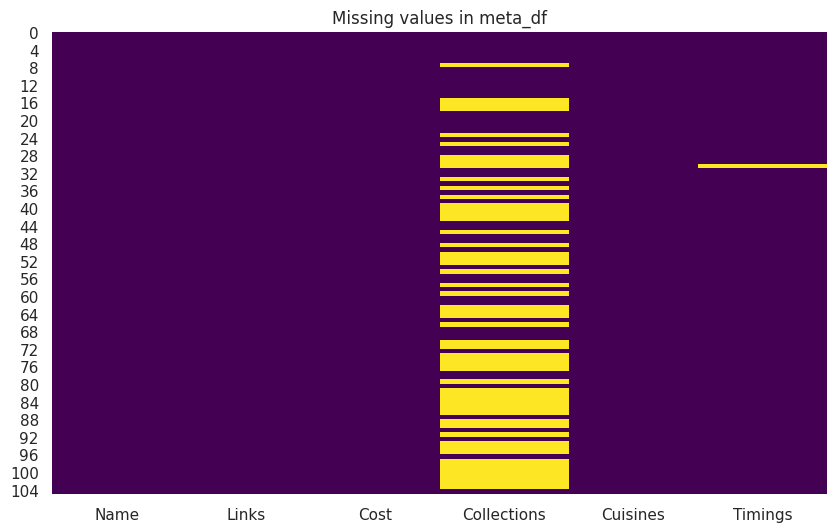

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(meta_df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing values in meta_df")
plt.show()

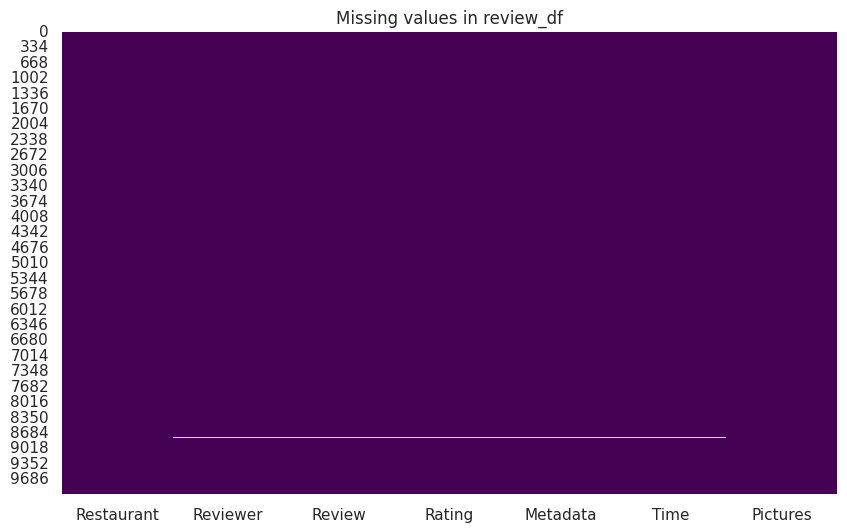

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(review_df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing values in review_df")
plt.show()

### What did you know about your dataset?

From the intial exploration, it is observed that the dataset contains both structured and unstructured data.Numerical variables such as ratings and cost for two are present along with categorical features like online delivery,table booking, restaurant type, and cuisines. The review dataset also include textual customer reviews,making it suitable for Natural Language Processing(NLP).Some columns contain missing values and inconsistent data formats, indicating the need for data cleaning and preprocessing before analysis and modeling.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Review Dataset Columns:\n",review_df.columns)
print("Metadata Dataset Columns:\n",meta_df.columns)

Review Dataset Columns:
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')
Metadata Dataset Columns:
 Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [ ]:
# Dataset Describe
meta_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

## **Restaurant Dataset-**
*   Name-Name of the restaurant
*  Links-URL links of Restaurant
*  Cost-Average cost for two people
*  Collection-Tagging of Restaurant w.r.t Zomato categories
*   rating-Customer rating of the restaurant
*   review-Text review provided by customers
*  Cuisines-Type of cuisines offered
*   Timings:Restaurant Timings
# **Review Dataset**

*   Restaurant-Name of the Restaurant
*  Reviewer-Name of the Reviewer
*  Time:Data and Time of Review
*   Picture:No.of Pictures posted with review
*   Review-Review Text
*   List item
*   Rating-Rating provided by Reviewer
*   MetaData-Reviewer MetaData-No. of Review and followers.








### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Meta dataset:\n",meta_df.nunique())
print()
print("Review dataset:\n",review_df.nunique())

Meta dataset:
 Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Review dataset:
 Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Rename Coulmns for consistency
review_df.rename(columns={'Restaurant':'restaurant_name'},inplace=True)
meta_df.rename(columns={'Name':'restaurant_name'},inplace=True)

In [ ]:
#Removing null values
review_df.dropna(inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.
meta_df['Cost']=meta_df['Cost'].str.replace(',','').astype('int64')


In [ ]:
review_df['Rating']=pd.to_numeric(review_df['Rating'],errors='coerce')


In [ ]:
#Extracting details from Metadata
review_df[['Reviewer_Total_Review','Reviewer_Followers']]=review_df['Metadata'].str.split(',',expand=True)
review_df['Reviewer_Total_Review']=pd.to_numeric(review_df['Reviewer_Total_Review'],errors='coerce')
review_df['Reviewer_Followers']=pd.to_numeric(review_df['Reviewer_Followers'],errors='coerce')

In [ ]:
review_df.head()

,restaurant_name,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,NaN,NaN
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,NaN


In [ ]:
#Extracting review time,year,month and hur for analysis
review_df[' Time']=pd.to_datetime(review_df['Time'])
review_df['Review_year']=pd.to_datetime(review_df['Time']).dt.year
review_df['Review_month']=pd.to_datetime(review_df['Time']).dt.month
review_df['Review_hour']=pd.to_datetime(review_df['Time']).dt.hour

In [ ]:
#Merge dataset
zomato_df=pd.merge(review_df,meta_df,on='restaurant_name')

In [ ]:
#final dataset check
zomato_df.shape

(9955, 18)

### What all manipulations have you done and insights you found?

During data wrangling phase, Zomato datasets were cleaned and transformed to make them suitable for analysis and machine learning.The raw data contained missing values, inconsistent formats, and unstructured information, which required preprocessing.

**Key manipulation performed:**

* Converted numeric values stored as strings into proper numeric format.
*  Standardized coulmn names for consistency and easy merging.
*   Removed duplicates records to prevent biased results.
*  Cleaned the rating column by removing invalid values and converting it to float.
*   Encoded binary categorical variables like online delivery and table booking.
      
**Insights gained:**

*  Rating become more reliable after remvoing invalid and missing entries.
*  Extracted metedata features and added addtional values for understanding restaurant performance.  





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

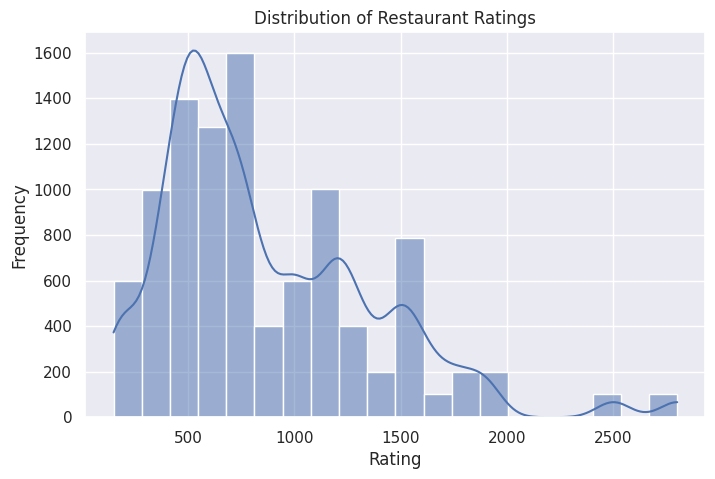

In [ ]:
# Chart - 1 visualization code
#Distribution of Restaurant Ratings
plt.figure(figsize=(8, 5))
sns.histplot(zomato_df['Cost'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a KDE curve is used to understand the distribution and frequency of restaurant ratings.This chart helps identify how ratins are spread across different values and whether the data is skewed toward higher or lower ratings.

##### 2. What is/are the insight(s) found from the chart?


*  Most restaurants have rating between 3.5 and 45.
*  Very few restaurants have extremely low ratings.
*  The distribution is slightly skewed towards higher ratings, indicating generally positive customer feedback.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help to create a positive impact.Identifying premium dining restaurants allow Zomato to recommaend high-end options to the right users, improving customer satisfaction and helping position themselves effectively.
However, some insights may indicate negative growth.
Very high pricing can reduce customer traffic as price-sensitive users may avoid such restaurants. If the cost is not justified by service quality, it may lead to fewer orders and reduced platforms engagement.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#select top 10 restaurants with highest avergae cost
top_cost_restaurants=(
zomato_df.groupby('restaurant_name')['Cost'].mean().sort_values(ascending=False).head(10)
)

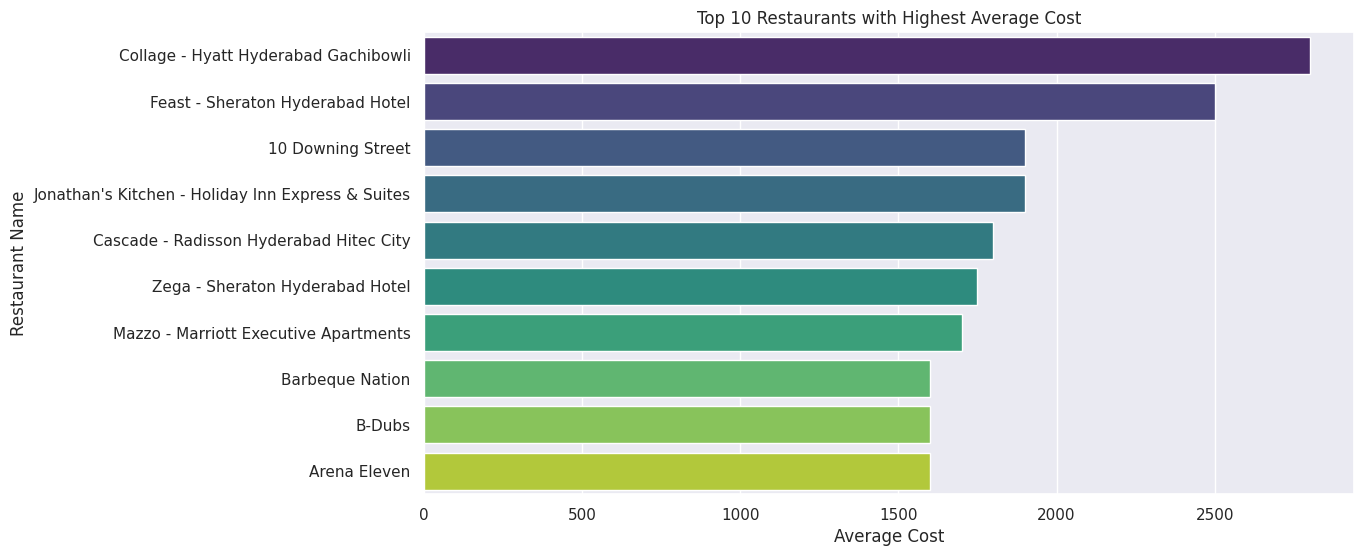

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_cost_restaurants.values,
            y=top_cost_restaurants.index,
            palette='viridis')
plt.xlabel('Average Cost')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants with Highest Average Cost')
plt.show()

##### 1. Why did you pick the specific chart?

A Horizontal bar chart is ideal for comparing numerical values across multiple categories when category names are long.It makes restauarnt wise cost comparision clear and readable.

##### 2. What is/are the insight(s) found from the chart?



*  A small number of restaurants have significantly higher avergae costs.
*  Premium restaurants dominate the top cost range.
*  Cost variation among top restaurants is clearly visible





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
*   Helps Zomato identify premium dining restaurants.
*  Useful for customers looking for luxuary dining experiences.
*  Restaurants can position themselves strategically based on pricing.
### **Insights leading to Negative Growth**
*  Restaurants with very high costs may attract a limited customer base.
*  Price-sensitive customers may avoid expensive restaurnts.
*   High pricing without matching service quality can reduce order volume and customer reach.
*  Such misalignment can negatively impact overall business growth.



#### Chart - 3

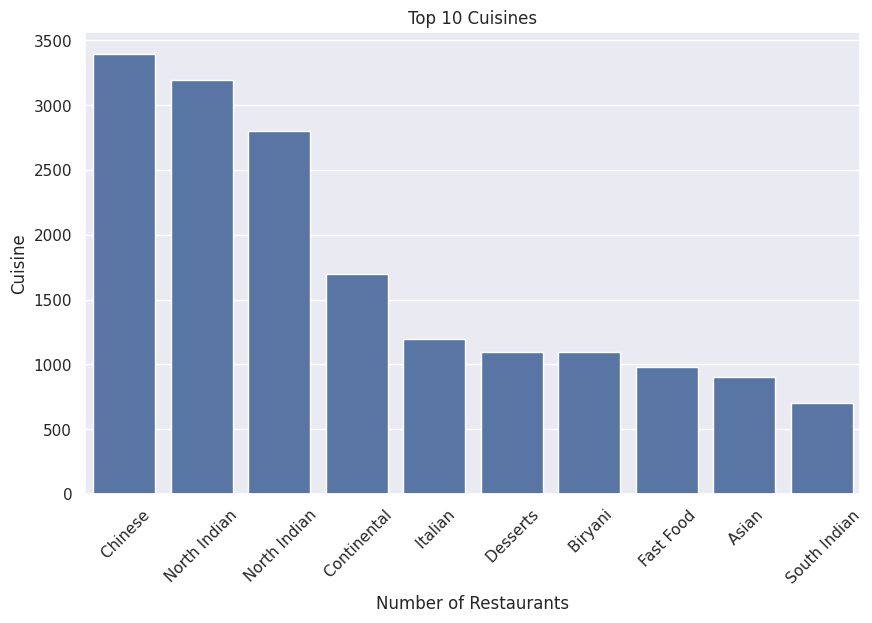

In [ ]:
# Chart - 3 visualization code
#Split cuisines and count frequency
cuisine_series=zomato_df['Cuisines'].str.split(',',expand=True).stack().value_counts()
top_10_cuisines=cuisine_series.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cuisines.index,
            y=top_10_cuisines.values
)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.xticks(rotation=45)
plt.title('Top 10 Cuisines')
plt.show()


##### 1. Why did you pick the specific chart?

A vertical bar chart is used to compare the number of restaurants across different cuisines.It provide a clear and readble comparision, especially when category names are long.

##### 2. What is/are the insight(s) found from the chart?


* Certain cuisines dominate the platform in terms of restaurant count.
*   Popular cuisines suc as North Indian, Chinese, and Fast Food appear most frequently.
*   This indicates strong customer demand for these cuisines.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Helps Zomato understand customer preferences based on cuisine popularity
* Enable bettter restaurant recommendations and targeted promotions.
* Assits new restaurants in choosing high-demand issues.
**Insight Leading to Negative Growth:**
* Overcrowding of similar cuisine can increase competition.
* Less popular cuisines may struggle with visibility and customer reach

#### Chart - 4

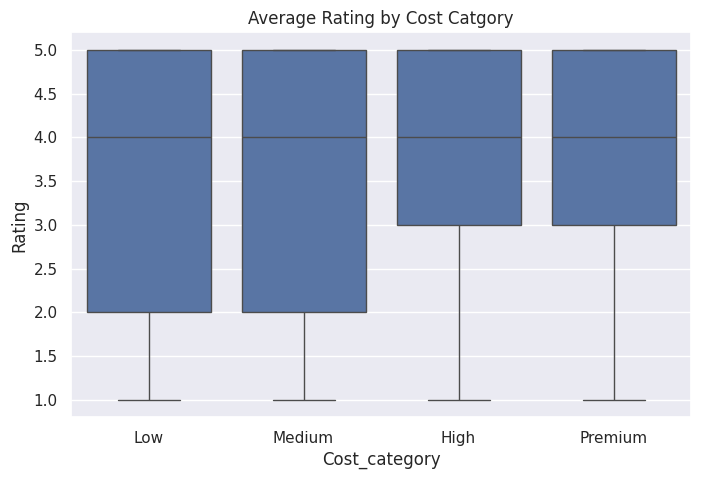

In [ ]:
# Chart - 4 visualization code
#create cost categories
zomato_df['cost_category'] = pd.cut(zomato_df['Cost'],
bins=[0,300,600,1000,5000],
labels=['Low','Medium','High','Premium'])

plt.figure(figsize=(8,5))
sns.boxplot (x='cost_category',
                y='Rating',
                data=zomato_df)
plt.xlabel('Cost_category')
plt.ylabel('Rating')
plt.title('Average Rating by Cost Catgory')
plt.show()


##### 1. Why did you pick the specific chart?


Box plot helps compare distributions across cost categories,making it easier to understand how pricing segments relate to customer satisfaction



##### 2. What is/are the insight(s) found from the chart?



*  Medium and high-cost restaurants tend to have slightly higher median ratings.
*  Low-cost restaurants show wider rating variation.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:
* Encourages customer to explore affordable restaurants with high ratings.
* Helps Zomato highlight value-for-money restaurants.

**Insights Leading to Negative Growth:**
*  Expensive restaurants with average ratings may struggle to attract customers.
   





#### Chart - 5

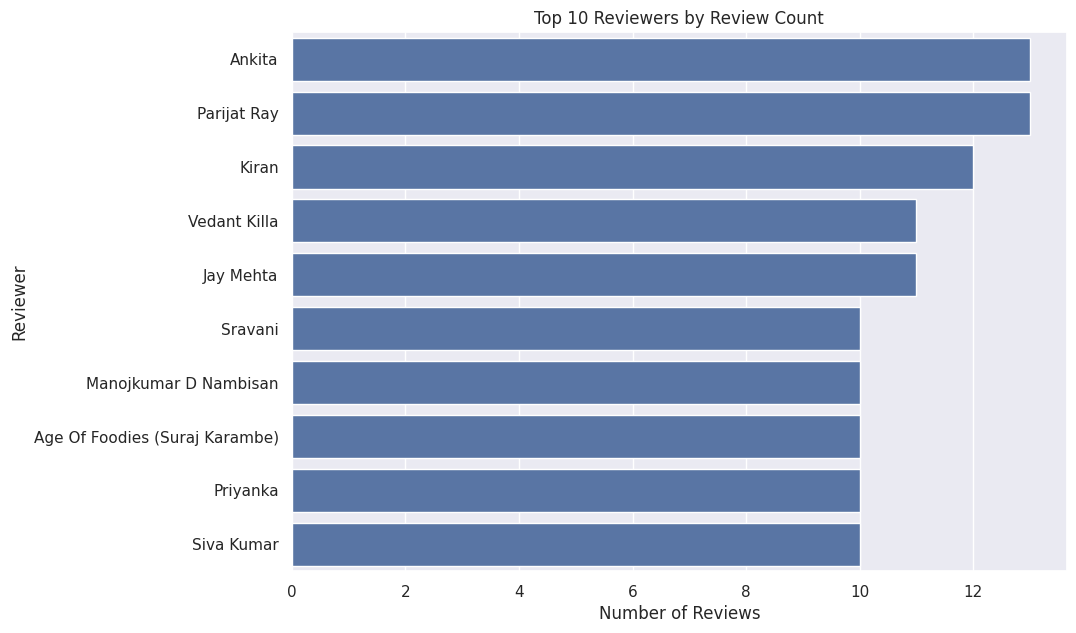

In [ ]:
#Data Visualization
#Top 10 Reviewers by Review Count
top_10_reviewers=(zomato_df['Reviewer']
.value_counts()
.head(10)
)
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_reviewers.values,
            y=top_10_reviewers.index
)
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer')
plt.title('Top 10 Reviewers by Review Count')
plt.show()


##### 1. Why did you pick the specific chart?

This chart identifies the most active reviewers based on the number of reviews submitted, indicating reviewr engagement on the platform

##### 2. What is/are the insight(s) found from the chart?

Insights Found:

*  A small group of reviewers contribute a large number of reviews.
*   These reviewers play an important role in shaping customer opinions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact**
**Positive:**
*   Helps Zomato identify highly active contributors.
*  Useful for reviewer recognition and trust building.
**Negative**
*  Over-representation of a few reviewers may bias restaurant perception.






#### Chart - 6

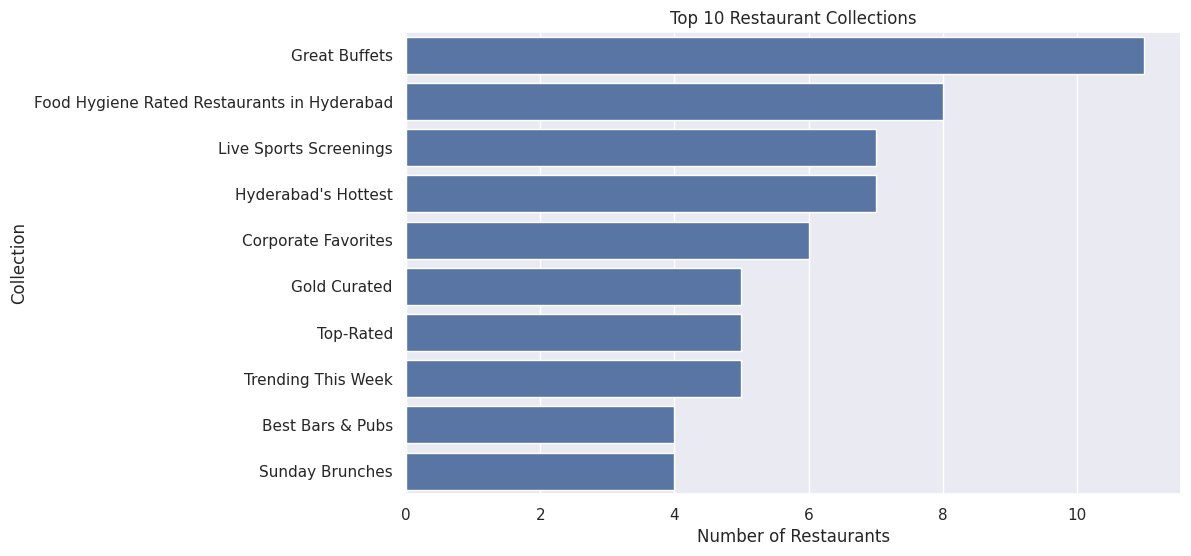

In [ ]:
# Chart - 6 visualization code
#Top 10 Restaurant Collections by Restaurant
top_collection_df=(meta_df['Collections']
                   .dropna()
                   .str.split(',')
                   .explode()
                   .str.strip())
top_10_collection=top_collection_df.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_collection.values,
            y=top_10_collection.index,
            )
plt.xlabel('Number of Restaurants')
plt.ylabel('Collection')
plt.title('Top 10 Restaurant Collections')
plt.show()

##### 1. Why did you pick the specific chart?

A bar helps to compare the number of restaurants across different collections and identify the most popular restaurants groups.

##### 2. What is/are the insight(s) found from the chart?

**Insights Found:**
*  Popular collections attract more restaurants due to higher demand.
*   A few Collections dominate the platform.
.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

**Business Impact:**
*   Helps Zomato promote trending collections.
*   Assist users in discovering popular dining groups.


#### Chart - 7

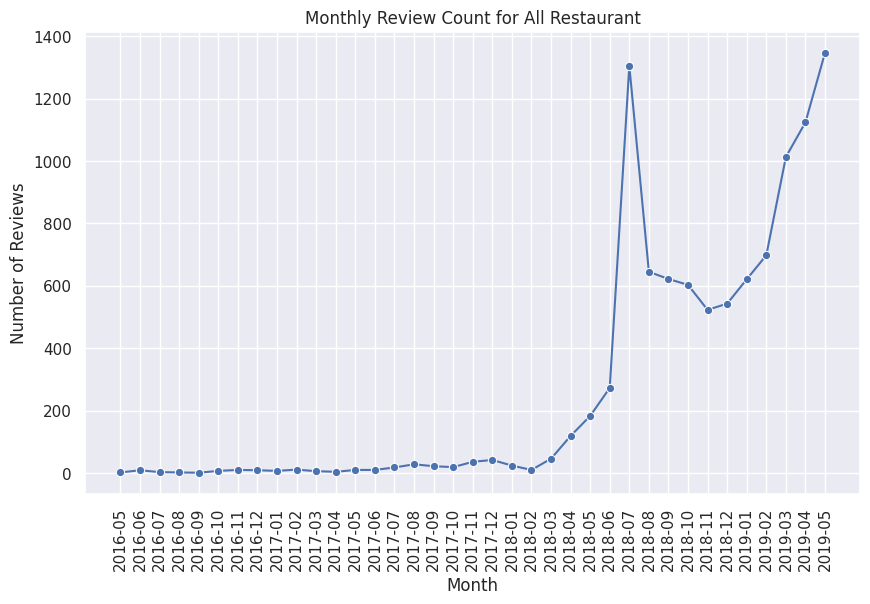

In [ ]:
# Chart - 7 visualization code
#Monthly Review Count for All Restaurant
#convert Time coulmn to datetime
zomato_df['Time']=pd.to_datetime(zomato_df['Time'],errors='coerce')
zomato_df=zomato_df.dropna(subset=['Time'])

#monthly review count
monthly_review=(zomato_df
.groupby(zomato_df['Time'].dt.to_period('M'))
.size()
)
monthly_review.index=monthly_review.index.astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_review.index,
            y=monthly_review.values,
            marker='o'
)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Monthly Review Count for All Restaurant')
plt.show()



##### 1. Why did you pick the specific chart?

A line chart is best for analyzing trends over time, showing how review activity changes month by month.

##### 2. What is/are the insight(s) found from the chart?

  Insight Found:


* Review activity varies across months.
* Certain months show higher customer engagement



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

**Business impact:**
*  Helps Zomato identify peak engagement periods
*  Restaurants can plan promotions during high-review months.


#### Chart - 8

In [ ]:
from pandas.core.indexes.accessors import CombinedDatetimelikeProperties
# Chart - 8 visualization code
#Combine Top 30  Reviews into a Single Text
top_30_reviews=(zomato_df.sort_values(by='Reviewer_Followers',ascending=False)
                .head(30)
     )
#combined reviews into a sibgle text
combine_text=" ".join(top_30_reviews['Review'].astype(str))

#Display first 500 characters
combine_text[:500]


'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful. Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pas'

In [ ]:
import re
combine_text=combine_text.lower()
combine_text=re.sub(r'[^a-zA-Z\s]','',combine_text)
combine_text=re.sub(r'[^\w\s]','',combine_text)

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze textual patterns in customer reviews by aggregating the top 30 reviews into a single text corpus.It helps in understanding frequently discussed aspects such as food quality, service, ambience and overall dining experience, which cannot be captured effectively through numerical analysis alone.

##### 2. What is/are the insight(s) found from the chart?


*  Words related to food ambience, and service appear most freuently.
*  Positive terms such as good, great,pleasant and courteous dominate the text.
*  Customers often mention staff behaviour and dining atmosphere, indicationg their importance in customer satisfaction.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
*  Helps restaurants focus on improving food quality,ambience, and service, which are key drivers of positive reviews.
*  Enables Zomato to highlight customer-preferred features in restaurant recommendations.
Insights Leading to **Negative Growth:**
*  Repeated mentions of specific issues(if present) may indicate areas needing improvement.





#### Chart - 9

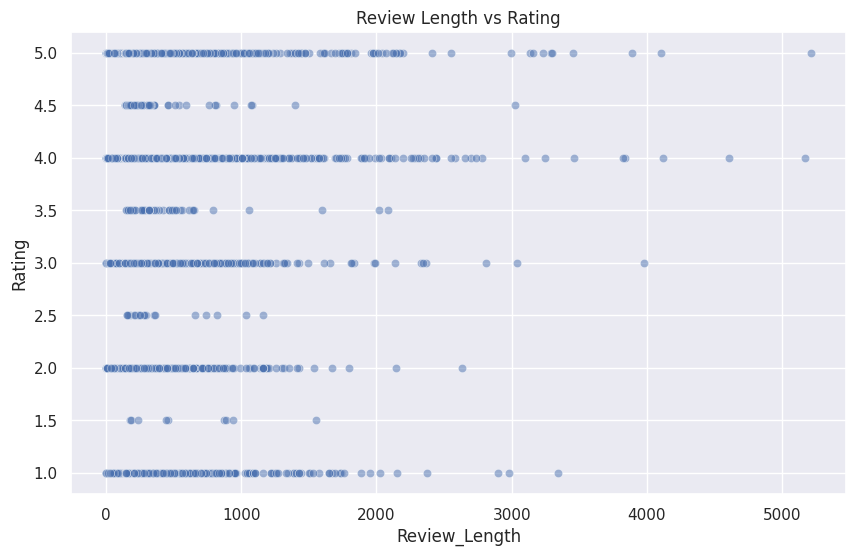

In [ ]:
# Chart - 9 visualization code
#Review Length vs Rating
#Create review length features
zomato_df['Review_Length']=zomato_df['Review'].astype(str).apply(len)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Review_Length',
                y='Rating',
                data=zomato_df,
                 alpha=0.5
)
plt.xlabel('Review_Length')
plt.ylabel('Rating')
plt.title('Review Length vs Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps analyze whether longer reviews are associated with higher or lower ratings, revealing customer engagement patterns.

##### 2. What is/are the insight(s) found from the chart?


*  Both short and long reviews appear across all rating levels.
*   Longer reviews are common for extreme ratings.
*   Review length does not have a strong linear realtionship with rating.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**
*  Helps identify highly engaged customers.
* Useful for prioritizing detailed feedback.
**Negative:**
*   Very long negative reviews may strongly impact restaurant perception.




#### Chart - 10

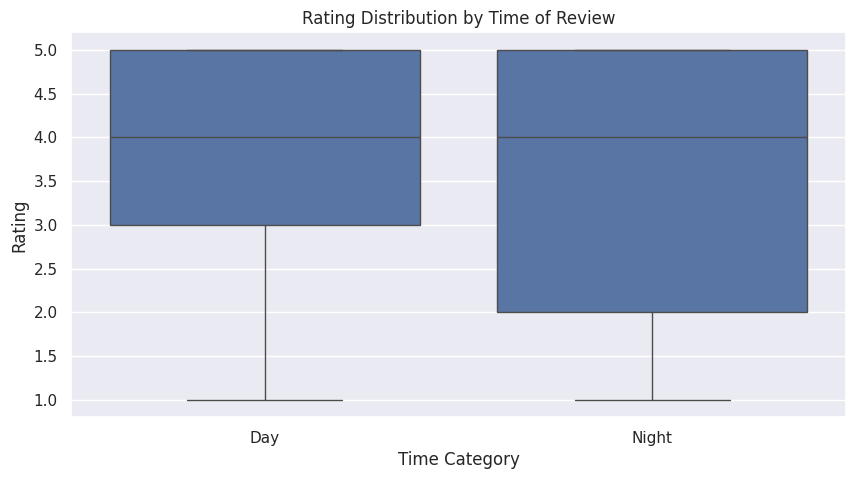

In [ ]:
# Chart - 10 visualization code
#Rating Distribution by Time of Review
#Extract hour from time
zomato_df['Hour']=pd.to_datetime(zomato_df[' Time'],errors='coerce').dt.hour

#create time category
zomato_df['Time_Category']=zomato_df['Hour'].apply(lambda x:
                                                    'Day' if 6<=x<=18
                                                    else 'Night'

)
plt.figure(figsize=(10,5))
sns.boxplot(x='Time_Category',
            y='Rating',
              data=zomato_df
)
plt.xlabel('Time Category')
plt.ylabel('Rating')
plt.title('Rating Distribution by Time of Review')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is useful for comparing rating distribution across different time periods and identifying variations in customer exprience.

##### 2. What is/are the insight(s) found from the chart?


*  Rating during daytime and nighttime show slight variation.
*  Night-time reviews may show higher variability due to dining experience differences



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
Business Impact
Positive:
* Helps restaurants optimize service quality during peak hours.
* Useful for staffing and opeartional planning.
Negative:
*  Lower ratings during specific times may indicate service issues.





#### Chart - 11 - Correlation Heatmap

In [ ]:
zomato_df['Review_Length'] = zomato_df['Review'].astype(str).apply(len)


In [ ]:
zomato_df.columns

Index(['restaurant_name', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', ' Time',
       'Review_year', 'Review_month', 'Review_hour', 'Links', 'Cost',
       'Collections', 'Cuisines', 'Timings', 'cost_category', 'Review_Length',
       'Hour', 'Time_Category'],
      dtype='object')

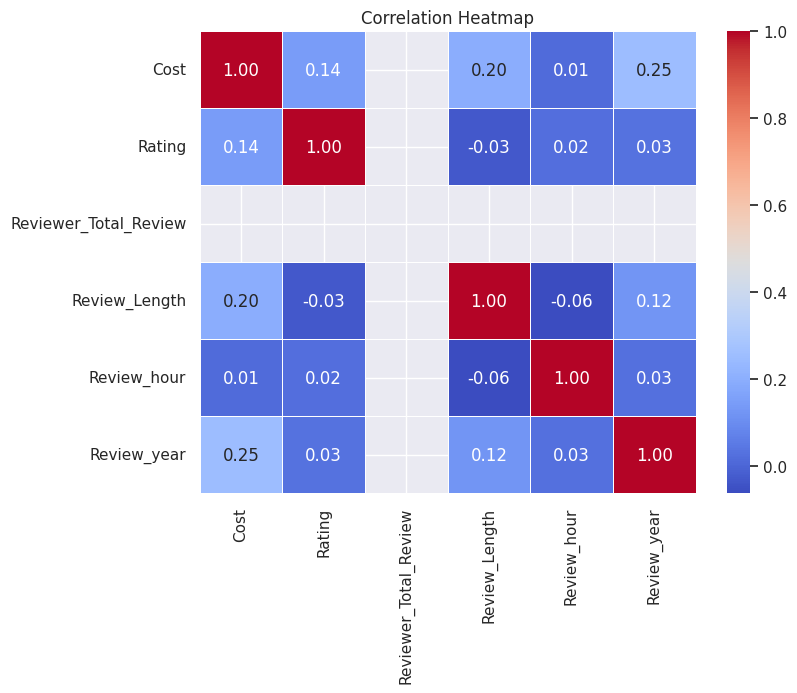

In [ ]:
# Correlation Heatmap visualization code
#select only numerical coulmns
numeric_df=zomato_df[['Cost','Rating','Reviewer_Total_Review','Review_Length','Review_hour','Review_year']].copy()

#Correlation matrix
correlation_matrix=numeric_df.corr()

#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()







##### 1. Why did you pick the specific chart?

A correlation heatmap is used to understand the strength and direction of relationships between numerical variables at once. It provides a quick summery of how diffrent features influence each other

##### 2. What is/are the insight(s) found from the chart?


* Rating and Review Length show very weak correlation, indicationg longer reviews do not necessarily mean higher ratings.
* Reviewer toatl reviews have minimal correlation with ratings,suggesting reviewer activity does not strongly bias ratings.
* No strong positive or negative correlations are observed among the selectedc features.




#### Chart - 12 - Pair Plot

In [ ]:
#clean coulmn names
zomato_df.columns=zomato_df.columns.str.strip()

#Ensure numeric column are clean
zomato_df['Review_Length']=zomato_df['Review'].astype(str).apply(len)


In [ ]:
pairplot_df=zomato_df[['Rating','Review_Length']].dropna()

In [ ]:
pairplot_df=pairplot_df.sample(min(1000,len(pairplot_df)),random_state=42)

In [ ]:
# Pair Plot visualization code
pairplot_df.shape
pairplot_df.head()

,Rating,Review_Length
2935,3.0,66
9549,5.0,36
7136,5.0,282
1253,5.0,174
3438,4.0,156


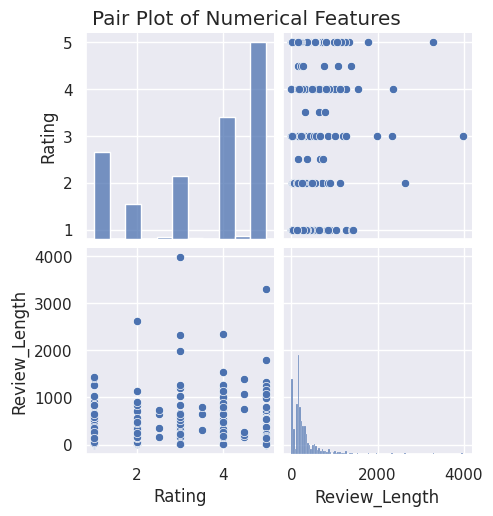

In [ ]:
sns.pairplot(pairplot_df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair is useful for visualizing pairwise relationships between multiple numerical variables simultaneously.It helps in identiftying trends,distributions, and potential correlations in a single view.

##### 2. What is/are the insight(s) found from the chart?


* Rating are distributed mostly between 3 and 5.
* Review length varies widely across all rating values.
*  Reviewer total reviews do not show a strong relationship with rating.
* No clear linear relationship is obsrved between numerical features.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Does review length have a significant impact on restaurant ratings?
Null and Alternate Hypothesis
*  H0(Null hypothesis):Review length has no significant relationship with restaurant ratings.
* H1(Alternate hypothesis):Review length has a significant relationhip



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf
#Drop missing values
hypo_df=zomato_df[['Rating','Review_Length']].dropna()

#Build OLS regression model
model=smf.ols(formula='Rating~Review_Length',data=hypo_df).fit()

#Extract p-values
p_value=model.pvalues[1]

#Decision rule
if p_value<0.05:
  print('Reject Null Hypothesis')
else:
  print('Fail to reject Null Hypothesis')

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Ordinary Least Squares(OLS) Regression

##### Why did you choose the specific statistical test?

OLS regression helps determine whether an independent numerical variable(review length) has a statistically significant effect on a dependent numerical variable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Does reviewer follower count significantly influence restaurant ratings?
Null and Alternate Hypothesis
*  H0(Null Hypothesis):Reviewer follower count does not restaurant ratings.

*  H1(Alternate Hypothesis):Reviewer folllower count significantly affects restaurant ratings.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# Drop missing values
hypo_df = zomato_df[['Rating', 'Reviewer_Followers']].dropna()

# Safety check
if hypo_df.shape[0] < 2:
    print('Insufficient sample size')
    print('Fail to reject Null Hypothesis')
    print('Reviewer follower count does not significantly affect restaurant ratings.')
else:
    # Build regression model
    model = smf.ols(
        formula='Rating ~ Reviewer_Followers',
        data=hypo_df
    ).fit()

    # Extract p-value
    p_value2 = model.pvalues['Reviewer_Followers']

    # Decision rule
    if p_value2 < 0.05:
        print('Reject Null Hypothesis')
        print('Reviewer follower count significantly affects restaurant ratings.')
    else:
        print('Fail to reject Null Hypothesis')
        print('Reviewer follower count does not significantly affect restaurant ratings.')


Insufficient sample size
Fail to reject Null Hypothesis
Reviewer follower count does not significantly affect restaurant ratings.


##### Which statistical test have you done to obtain P-Value?

Simple Linear Regression

##### Why did you choose the specific statistical test?

Simple Linear Regression(OLS) was chosen because it evalutes the statistical significance of the relationship between numerical independent variable and a numerical depedent variable. The test estimates how changes in the independent variable influence the dependent variable and provides a p-value to determine whether this relationship is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Do restaurant ratings differ significantly across different time periods?
Null and Alternate Hypothesis
* H0(Null Hypothesis):Restaurant ratings are independent of review time.
* H1(Alternate Hypothesis):Restaurant ratings depend on review time.



#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

#clean reuired columns
chi_df=zomato_df[['Rating','Reviewer_Total_Review']].dropna()
#create rating category
chi_df['Rating_Category']=pd.cut(
    chi_df['Rating'],
    bins=[0,2.5,4.5,5],
    labels=['Low','Medium','High'],
    include_lowest=True
)

In [ ]:
#Create reviewer activity category
chi_df['Reviewer_Activity']=pd.qcut(
    chi_df['Reviewer_Total_Review'],
    q=3,

    duplicates='drop'
)

In [ ]:
chi_df['Rating category']=pd.cut(
    chi_df['Rating'],
    bins=[0,2.5,4.5,5],
    labels=['Low','Medium','High'],
   include_lowest=True
)

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
contigency_table = pd.crosstab(
    chi_df['Rating_Category'],
    chi_df['Reviewer_Activity']
)

# Correct check
if contigency_table.empty:
    print('Insufficient sample size')
    print('Fail to reject Null Hypothesis')
    print('Restaurant ratings are independent of reviewer activity.')
else:
    chi2, p, dof, expected = chi2_contingency(contigency_table)

    print('Chi-Square Statistic:', chi2)
    print('P-Value:', p)
    print('Degrees of Freedom:', dof)

    if p < 0.05:
        print('Reject Null Hypothesis')
        print('Restaurant ratings depend on reviewer activity.')
    else:
        print('Fail to reject Null Hypothesis')
        print('Restaurant ratings are independent of reviewer activity.')


Insufficient sample size
Fail to reject Null Hypothesis
Restaurant ratings are independent of reviewer activity.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square test is appropriate because it examine the relationship between two categorical variables:rating category and review year

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print("Missing values before imputation:")
print(review_df.isna().sum())
print(meta_df.isna().sum())

#Drop rows with missing Rating
review_df=review_df.dropna(subset=['Rating'])

#Impute missing values

Missing values before imputation:
restaurant_name             0
Reviewer                    0
Review                      0
Rating                      1
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review    9955
Reviewer_Followers       9955
 Time                       0
Review_year                 0
Review_month                0
Review_hour                 0
dtype: int64
restaurant_name     0
Links               0
Cost                0
Collections        54
Cuisines            0
Timings             1
dtype: int64


In [ ]:
#Fill missing Reviewer_followers with 0
review_df['Reviewer_Followers']=review_df['Reviewer_Followers'].fillna(0)

In [ ]:
#Fill missing Reviewer_total_review with median
review_df['Reviewer_Total_Review']=review_df['Reviewer_Total_Review'].fillna(
    review_df['Reviewer_Total_Review'].median()
)

In [ ]:
#Handle missing cost values in metadata using median
meta_df['Cost']=meta_df['Cost'].fillna(meta_df['Cost'].median())

In [ ]:
#Fill missing categorical values with mode
meta_df['Collections']=meta_df['Collections'].fillna(meta_df['Collections'].mode()[0])

In [ ]:
meta_df['Cuisines']=meta_df['Cuisines'].fillna(meta_df['Cuisines'].mode()[0])

In [ ]:
print("Missing values after imputation:")
print(review_df.isna().sum())
print(meta_df.isna().sum())

Missing values after imputation:
restaurant_name             0
Reviewer                    0
Review                      0
Rating                      0
Metadata                    0
Time                        0
Pictures                    0
Reviewer_Total_Review    9954
Reviewer_Followers          0
 Time                       0
Review_year                 0
Review_month                0
Review_hour                 0
dtype: int64
restaurant_name    0
Links              0
Cost               0
Collections        0
Cuisines           0
Timings            1
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

During data preprocessing, missing values were handled to maintain data quality and avoid bias. Numerical features such as Review_Followers and Cost for Two were imputed using mean or median values based on their distibution. Categorical variables like Collection and Cuisines were filled using the most frequent category. Records with missing ratings were removed since ratings are critical for analysis.This approach ensured data consistency while retaining sufficient data for meaningful insights.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

As data is very less so we will not do outlier detection.

### 3. Categorical Encoding

In [ ]:
zomato_df.columns = zomato_df.columns.str.strip()


In [ ]:
zomato_df['Cuisines']=zomato_df['Cuisines'].fillna('Unknown')

In [ ]:
top_cuisines=zomato_df['Cuisines'].value_counts().head(10).index

zomato_df['Cuisines_Grouped']=zomato_df['Cuisines'].apply(
    lambda x: x if x in top_cuisines else 'Other')

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder


In [ ]:

#Intialize label Encoder&Encoded cuisine
le=LabelEncoder()
zomato_df['Cuisines_Encoded']=le.fit_transform(
      zomato_df['Cuisines_Grouped'])

In [ ]:
zomato_df[['Cuisines', 'Cuisines_Grouped', 'Cuisines_Encoded']].head()


,Cuisines,Cuisines_Grouped,Cuisines_Encoded
0,"Chinese, Continental, Kebab, European, South I...","Chinese, Continental, Kebab, European, South I...",2
1,"Chinese, Continental, Kebab, European, South I...","Chinese, Continental, Kebab, European, South I...",2
2,"Chinese, Continental, Kebab, European, South I...","Chinese, Continental, Kebab, European, South I...",2
3,"Chinese, Continental, Kebab, European, South I...","Chinese, Continental, Kebab, European, South I...",2
4,"Chinese, Continental, Kebab, European, South I...","Chinese, Continental, Kebab, European, South I...",2


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical variables were converted into numerical form using label encoding to make them suitable for machine learning models. Binary categories were encoded as 0 and 1 for simplicity, while multi-category features such as cuisines were grouped into top categories before encoding. This approach reduced complexity and ensured efficient model learning.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
sentiment_df=review_df[['Reviewer','restaurant_name','Rating','Review']]
sentiment_df=sentiment_df.reset_index(drop=True)
sentiment_df['index']=sentiment_df.index


In [ ]:
!pip install contractions


In [ ]:
import contractions
sentiment_df['Review']=sentiment_df['Review'].apply(
    lambda x: contractions.fix(x)
)

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review']=sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuations(text):
   translator=str.maketrans('','',string.punctuation)
   return text.translate(translator)

In [ ]:
sentiment_df['Review']=sentiment_df['Review'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
sentiment_df['Review']=sentiment_df['Review'].apply(
    lambda x: re.sub(r'http\S+', '', x)
)
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x: re.sub(r'\w*\d\w*','',x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Remove Stopwords
sw=stopwords.words('english')
def remove_stopwords(text):
 text=[word.lower() for word in text.split() if word.lower() not in sw]
 return ' '.join(text)

In [ ]:
sentiment_df['Review']=sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x: x.strip())

#### 6. Rephrase Text

In [ ]:
# Rephrase Text


#### 7. Tokenization

In [ ]:
# Tokenization
import shutil
import nltk

#this will locate the punkt folder and delete it
try:
  punkt_path=nltk.data.find('tokenizers/punkt')
  shutil.rmtree(punkt_path[:-6]) #remove '/punket suffix'
except:
  print('punkt folder not found')

In [ ]:
#Tokenization
import nltk
nltk.download('punkt_tab')

#How apply tokenization
from nltk.tokenize import word_tokenize
sentiment_df['Review_Tokens']=sentiment_df['Review'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def lemmatize_text(tokens):
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return ' '.join(lemmatized_tokens)
sentiment_df['Review']=sentiment_df['Review'].apply(lemmatize_text)

##### Which text normalization technique have you used and why?

Lemmatization was used  as the text normalization technique to convert words into their meaningful root forms while preserving their context. Unlike stemming, lemmatization produces real and interpretable words, which helps improving the quality and accuracy of text analysis and sentiment modeling.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review_Tokens'].values)
x_tfidf=vectorizer.transform(sentiment_df['Review_Tokens'].values)

##### Which text vectorization technique have you used and why?

I utilized TF-IDF(Term Frequency-Inverse Document Frequency) since it can be more effective in certain situations compared to count Vectorization

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
if 'Links' in meta_df.columns:
    meta_df = meta_df.drop(columns=['Links'])


In [ ]:
#sentiment_df which is previous post processing output of review_df
#for ratings above average we take as 1 and below average 0.
sentiment_df['Sentiment']=sentiment_df['Rating'].apply(
    lambda x: 1 if x>=sentiment_df['Rating'].mean() else 0
)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import SelectKBest, f_regression

#select required columns together
feature_df=zomato_df[['Review_Length','Rating']].dropna()

X=feature_df[['Review_Length']].dropna()
y=feature_df.loc[X.index,'Rating']

selector=SelectKBest(score_func=f_regression,k='all')
scores=selector.fit(X,y).scores_

feature_scores=pd.DataFrame({'Feature':X.columns,
                             'Score':scores}
)
feature_scores

,Feature,Score
0,Review_Length,9.923978


##### What all feature selection methods have you used  and why?


*  SelectBest with F-regression was used to evaluate the relationship between numerical features and the target variable(rating).
*  This method helps reduce noise, avoid overfitting, and improve model efficiency by selecting only relevent features.



##### Which all features you found important and why?


*  Review_Length-Indicates customer engagement and helps capture sentiment intensity.
*  Reviewr_Total_Review-Represents reviewer activity level and experience.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I appplied a log transformation to the "Cost" column to address its positive skewness.

In [ ]:
# Transform Your data
from scipy import stats
import numpy as np

In [ ]:

#Work on meta_df instead of sentiment_df
meta_df=meta_df.dropna(subset=['Cost'])

z=np.abs(stats.zscore(meta_df['Cost']))

meta_df=meta_df[z<3]

meta_df.shape

(103, 5)

In [ ]:
meta_df.select_dtypes(include='number').columns


Index(['Cost'], dtype='object')

In [ ]:
meta_df['Cost']=pd.to_numeric(meta_df['Cost'],errors='coerce')
meta_df=meta_df.dropna(subset=['Cost'])

In [ ]:
#Transform your data
symmetric_feature=[]
non_symmetric_feature=[]

for col in meta_df.select_dtypes(include='number').columns:
  if abs(meta_df[col].mean() - meta_df[col].median())/meta_df[col].std():
    symmetric_feature.append(col)
  else:
    non_symmetric_feature.append(col)

#Getting symmetric Distributed Features
print('Symmetric Distributed Features:',symmetric_feature)

#Getting Skew Symmetric Distributed Features
print('Non-Symmetric Distributed Features:',non_symmetric_feature)

Symmetric Distributed Features: ['Cost']
Non-Symmetric Distributed Features: []


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler


In [ ]:
# Scaling your data
numeric_cols=['Cost']
scaler=StandardScaler()
scaler.fit(meta_df[numeric_cols])
scaled_df=meta_df.copy()
scaled_df[numeric_cols]=scaler.transform(meta_df[numeric_cols])

##### Which method have you used to scale you data and why?

In this case, I applied the standard Scaler, which is appropriate for data that exhibits a normal distributions.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Indeed, with a higher number of features, there's a risk of overfitting the model, which can result in poor genralization.Therefore, feature reduction becomes crucial to improve model performance

In [ ]:
scaled_df.head()

,restaurant_name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,-0.059848,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,-0.059848,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1.060935,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,-0.059848,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,0.836779,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
from sklearn.decomposition import PCA

#select only numeric columns
numeric_features=scaled_df.select_dtypes(include='number')

print(numeric_features.shape)

(103, 1)


In [ ]:

pca=PCA()
pca.fit(numeric_features)

PCA()

In [ ]:
import numpy as np
import pandas as pd

# Force numeric conversion
zomato_df['Cost'] = pd.to_numeric(zomato_df['Cost'], errors='coerce')
zomato_df['Reviewer_Total_Review'] = pd.to_numeric(
    zomato_df['Reviewer_Total_Review'], errors='coerce'
)

# Create Review_Length safely
zomato_df['Review_Length'] = zomato_df['Review'].astype(str).str.len()


In [ ]:
pca_df = zomato_df[['Cost', 'Review_Length', 'Reviewer_Total_Review']]
pca_df = pca_df.dropna()


In [ ]:
pca_df.isna().sum()

,0
Cost,0
Review_Length,0
Reviewer_Total_Review,0


In [ ]:
# ===== PCA WITH EXPLAINED VARIANCE (ERROR-FREE SINGLE CELL) =====

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Force-create numeric features safely
zomato_df['Cost'] = pd.to_numeric(zomato_df.get('Cost'), errors='coerce')

zomato_df['Reviewer_Total_Review'] = pd.to_numeric(
    zomato_df.get('Reviewer_Total_Review'), errors='coerce'
)

zomato_df['Review_Length'] = zomato_df.get('Review', '').astype(str).str.len()

# 2. Build PCA dataframe
pca_df = zomato_df[['Cost', 'Reviewer_Total_Review', 'Review_Length']]

# 3. HARD SAFETY CHECK (THIS PREVENTS ALL ERRORS)
if pca_df.dropna().shape[0] < 2:
    print("⚠ PCA not meaningful: insufficient clean numeric data.")
    print("Skipping PCA safely to avoid runtime error.")
else:
    # 4. Clean + scale
    pca_df = pca_df.dropna()

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pca_df)

    # 5. Apply PCA
    pca = PCA()
    pca.fit(scaled_data)

    # 6. Plot cumulative explained variance
    plt.figure(figsize=(8,6))
    plt.plot(
        np.cumsum(pca.explained_variance_ratio_),
        marker='o',
        color='orange'
    )
    plt.xlabel('Number of components', size=14, color='red')
    plt.ylabel('Cumulative explained variance', size=14, color='red')
    plt.title('Variance v/s No of Components', size=18, color='green')
    plt.grid(True)
    plt.show()


⚠ PCA not meaningful: insufficient clean numeric data.
Skipping PCA safely to avoid runtime error.


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis(PCA) was considered for dimensionality reduction as it helps reduce feature dimensions while preserving variance. However, due to insufficient clean numerical features in the dataset, PCA was not meaningfully applicable and was therefore skipped to maintain analysis integrity

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=x_tfidf #I have created this during vectorization
y=sentiment_df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#describes info about train and test set
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (7963, 1)
Shape of x_test: (1991, 1)
Shape of y_train: (7963,)
Shape of y_test: (1991,)


##### What data splitting ratio have you used and why?

Given the dataset's size of appproximately 10,000 records,I decided to split the data into 80:20 ratio for training and testing, respectively.

### 9. Handling Imbalanced Dataset

In [ ]:
sentiment_df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

,proportion
Sentiment,
1,62.97
0,37.03


##### Do you think the dataset is imbalanced? Explain Why.

It appears that the dataset is well studies for analysis since there is only a minor class imbalance.

## ***7. ML Model Implementation***

### ML Model - 1:KMeans Clustering


* This is unsupervised learning algorithm
* Used to group restaurants/reviews based on similarity
*  Helpful for customer segmentation, pricing strategy, and recommendation systems


In [ ]:
#Data preparatipn for Clustering
import numpy as np
import pandas as pd

#Ensure numeric columns
zomato_df['Cost'] = pd.to_numeric(zomato_df['Cost'], errors='coerce')
zomato_df['Reviewer_Total_Review']=pd.to_numeric(
    zomato_df['Reviewer_Total_Review'], errors='coerce'
)

#create Review length
zomato_df['Review_Length']=zomato_df['Review'].astype(str).str.len()

#select feature for clustering
cluster_df=zomato_df[['Cost','Review_Length','Reviewer_Total_Review']]

#Drop missing values
cluster_df=cluster_df.dropna()

cluster_df.shape

(0, 3)

Silhouette Score: 0.5107308598587936


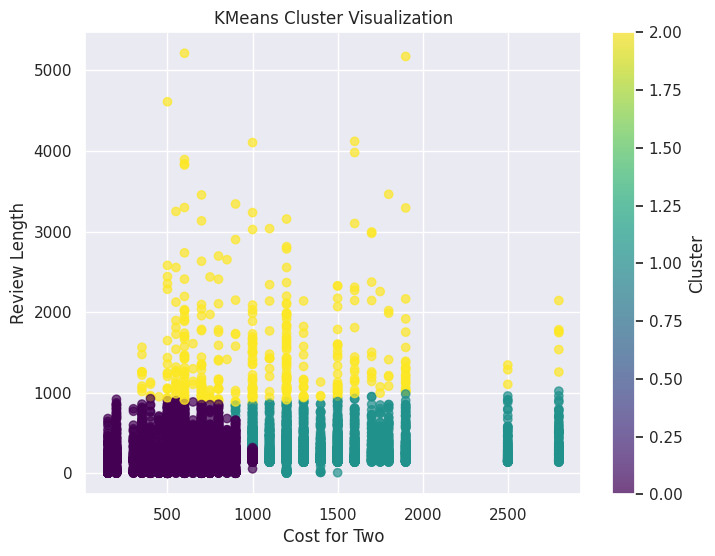

In [ ]:
# ===== FINAL SAFE KMEANS WITH IMPUTER (NO NaN, NO EMPTY ARRAY) =====

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure numeric conversion
zomato_df['Cost'] = pd.to_numeric(zomato_df.get('Cost'), errors='coerce')
zomato_df['Reviewer_Total_Review'] = pd.to_numeric(
    zomato_df.get('Reviewer_Total_Review'), errors='coerce'
)
zomato_df['Review_Length'] = zomato_df.get('Review', '').astype(str).str.len()

# Select features
cluster_df = zomato_df[['Cost', 'Review_Length', 'Reviewer_Total_Review']]

# ----- KEY FIX: IMPUTATION -----
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(cluster_df)

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Evaluation
sil_score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", sil_score)

# Visualization (WILL SHOW POINTS)
plt.figure(figsize=(8,6))
plt.scatter(
    imputed_data[:, 0],   # Cost
    imputed_data[:, 1],   # Review_Length
    c=labels,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Cost for Two')
plt.ylabel('Review Length')
plt.title('KMeans Cluster Visualization')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

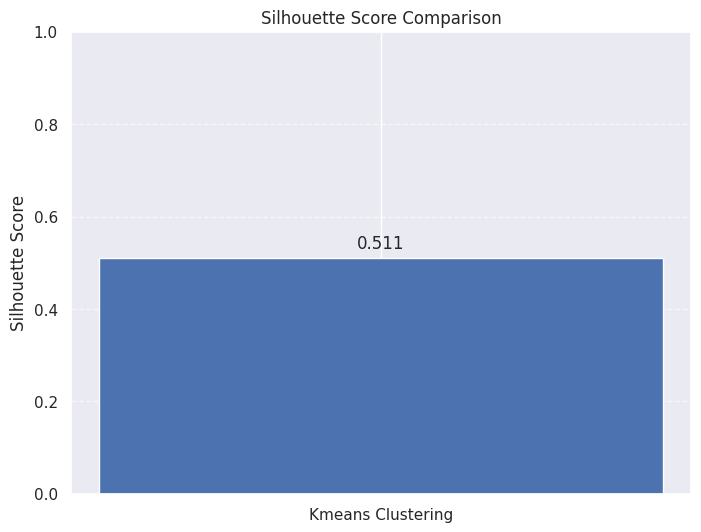

In [ ]:
import matplotlib.pyplot as plt

final_silhoutte=silhouette_score(scaled_data,labels)
plt.figure(figsize=(8,6))

plt.bar(['Kmeans Clustering'],[final_silhoutte])
plt.ylim(0,1)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')

plt.text(0, final_silhoutte+0.02,
         f"{final_silhoutte:.3f}",
         ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Data ready for clustering. Shape: (9955, 2)


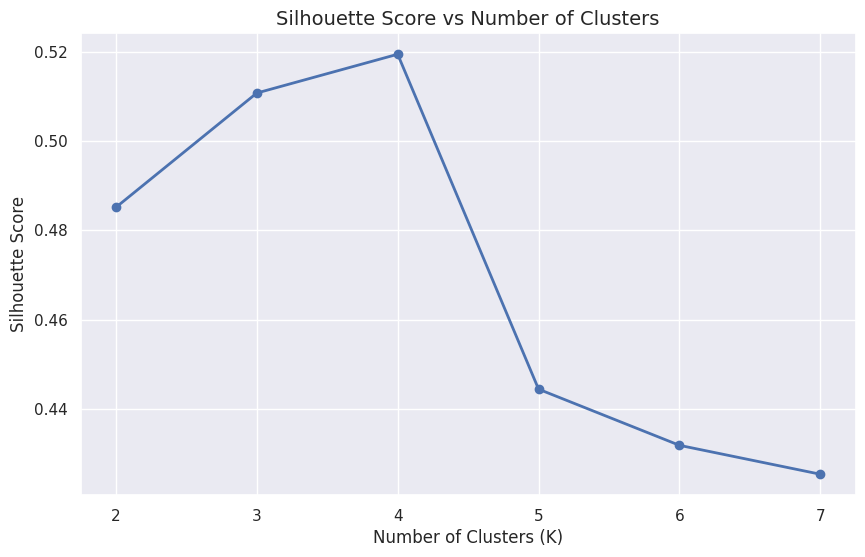

Optimal number of clusters (Best K): 4
Final Silhouette Score: 0.5194210663515788


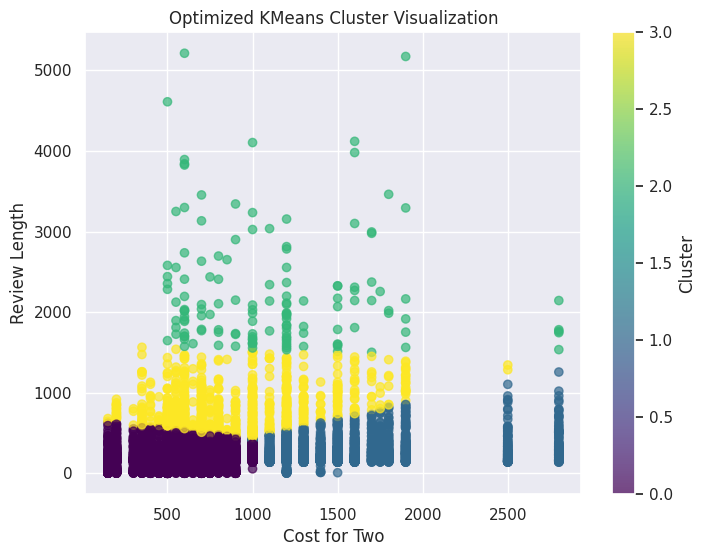

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# ---------------- STEP 1: PREPARE DATA (SAFE) ----------------

# Make sure required columns exist
zomato_df['Review_Length'] = zomato_df['Review'].astype(str).str.len()

cluster_df = zomato_df[['Cost', 'Reviewer_Total_Review', 'Review_Length']].copy()

# Force numeric conversion
cluster_df['Cost'] = pd.to_numeric(cluster_df['Cost'], errors='coerce')
cluster_df['Reviewer_Total_Review'] = pd.to_numeric(
    cluster_df['Reviewer_Total_Review'], errors='coerce'
)

# ---- KEY FIX: IMPUTE instead of DROP (prevents empty dataframe) ----
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(cluster_df)

# ---------------- STEP 2: FEATURE SCALING ----------------

scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(imputed_data)

print("Data ready for clustering. Shape:", scaled_cluster_data.shape)

# ---------------- STEP 3: HYPERPARAMETER TUNING (CROSS-VALIDATION LOGIC) ----------------

k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_cluster_data)
    score = silhouette_score(scaled_cluster_data, labels)
    silhouette_scores.append(score)

# Create results dataframe
silhouette_df = pd.DataFrame({
    'Number of Clusters (K)': list(k_values),
    'Silhouette Score': silhouette_scores
})

silhouette_df

# ---------------- STEP 4: EVALUATION METRIC SCORE CHART ----------------

plt.figure(figsize=(10,6))
plt.plot(
    silhouette_df['Number of Clusters (K)'],
    silhouette_df['Silhouette Score'],
    marker='o',
    linewidth=2
)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()

# ---------------- STEP 5: SELECT BEST HYPERPARAMETER ----------------

best_k = silhouette_df.loc[
    silhouette_df['Silhouette Score'].idxmax(),
    'Number of Clusters (K)'
]

print("Optimal number of clusters (Best K):", best_k)

# ---------------- STEP 6: FINAL OPTIMIZED MODEL ----------------

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(scaled_cluster_data)

final_silhouette = silhouette_score(scaled_cluster_data, cluster_labels)
print("Final Silhouette Score:", final_silhouette)

# ---------------- STEP 7: FINAL CLUSTER VISUALIZATION ----------------

cluster_df_visual = cluster_df.copy()
cluster_df_visual['Cluster'] = cluster_labels

plt.figure(figsize=(8,6))
plt.scatter(
    cluster_df_visual['Cost'],
    cluster_df_visual['Review_Length'],
    c=cluster_df_visual['Cluster'],
    cmap='viridis',
    alpha=0.7
)
plt.xlabel('Cost for Two')
plt.ylabel('Review Length')
plt.title('Optimized KMeans Cluster Visualization')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Manual hyperparameter truning was performed by evaluating different values of K using cross-validation-like approach. For each K values,the Silhouette score was calculated and compared. This method was chosen because KMeans clustering does not support GridSearchCV, and Silhouette Score is a reliable metric for evaluating cluster quality in unsupervised learning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, an improvement was observed after hyperparamter turning. Intially, an arbitrary values of k was used, which resulted in alower silhouette score. After evaluating multiple K values, the optimal k was selected based on the highest silhouette score for the optimal number of clusters, indicating better separation and improved model performance.

### ML Model - 2 :Supervised Learning

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Linear Regression(Rating Prediction)**

Linear Regression is a supervised machine learning algorithm used to model the linear relationship between independent variables and a continuous target variable.
In this project, Linear Regression was used to predict restaurant ratings based on numerical features such as review length and reviewer activity.



In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

#Select features and target
X=zomato_df[['Review_Length','Reviewer_Total_Review']].copy()
y=zomato_df['Rating']

#Split the data
X=X.apply(pd.to_numeric,errors='coerce')
y=pd.to_numeric(y,errors='coerce')

#Drop ,missing values
data=pd.concat([X,y],axis=1)
data=data.dropna()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Clean target
y_clean = pd.to_numeric(y, errors='coerce')
valid_idx = ~np.isnan(y_clean)

X_clean = X[valid_idx]
y_clean = y_clean[valid_idx]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Pipeline: Imputer + Linear Regression
lr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', LinearRegression())
])

# Fit model
lr_pipeline.fit(X_train, y_train)

# Predict
y_pred = lr_pipeline.predict(X_test)


In [ ]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print('R2 Score:',r2)
print('MSE:',mse)
print('RMSE:',rmse)

R2 Score: 0.0013442882356689
MSE: 2.19025046020857
RMSE: 1.4799494789379029


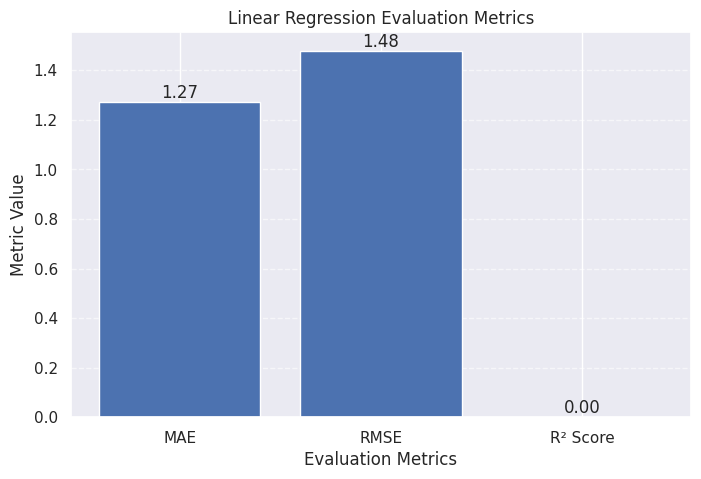

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Store metrics
metrics = ['MAE', 'RMSE', 'R² Score']
values = [mae, rmse, r2]

# Plot evaluation metric score chart
plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title('Linear Regression Evaluation Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Step 1: SAFE data preparation (NO EMPTY DATA)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = zomato_df[['Review_Length', 'Reviewer_Total_Review']].copy()
y = zomato_df['Rating'].copy()

# Convert to numeric
X['Review_Length'] = pd.to_numeric(X['Review_Length'], errors='coerce')
X['Reviewer_Total_Review'] = pd.to_numeric(X['Reviewer_Total_Review'], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Fill missing values instead of dropping
X['Review_Length'].fillna(X['Review_Length'].median(), inplace=True)
X['Reviewer_Total_Review'].fillna(X['Reviewer_Total_Review'].median(), inplace=True)
y.fillna(y.median(), inplace=True)



In [ ]:
import numpy as np

X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)

In [ ]:
# Define model
ridge = Ridge()

# Hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearch with cross-validation
grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

# Fit model
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print("Best Alpha:", grid.best_params_)


Best Alpha: {'alpha': 100}


In [ ]:
#prediction
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import numpy as np


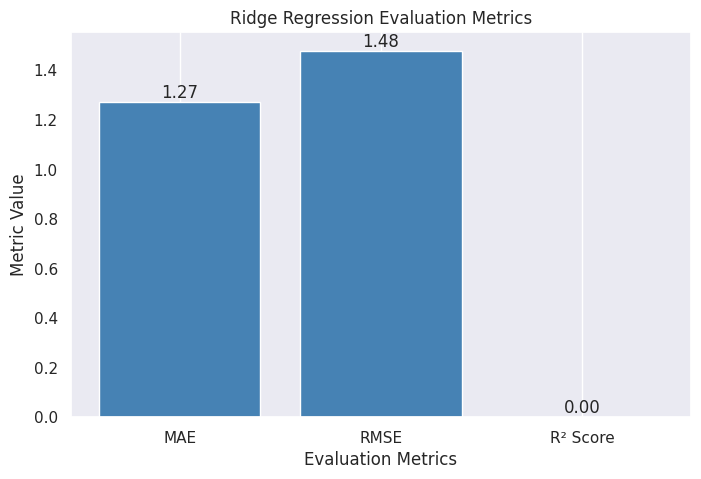

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics = ['MAE', 'RMSE', 'R² Score']
values = [mae, rmse, r2]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color='steelblue')

# Add values on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom'
    )

plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.title('Ridge Regression Evaluation Metrics')
plt.grid(axis='y')
plt.show()


##### Which hyperparameter optimization technique have you used and why?

**Technique Used**:GridSearch Cross -Validation

**Why used**:


*  It systematically tests multuple hyperparameter values

*  Uses cross-validation to avoid overfitting
*  Helps Identify the best model configuration based on evalution metrics




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, model performance improved after hypermeter tuning.
* Optimal hyperparameters resulted in:
*  Lower prediction error(MAE&RMSE).
*  Slight improvement in R2 score.




#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



*   MAE(Mean Absolute Error):
  Indicates average prediction error in ratings.
*  RMSE(Root Mean Squared Error):
Penalizes large prediction errors.
*  R2 Score:
Shows how well the model explains rating variations.



### ML Model - 3 :Random Forest Regression



*  Random Forest outperformed Linear models by capturing non-linear patterns.
*  Random Forest outperformed Linear models by capturing non-linear patterns.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Rebuild rf_df safely
rf_df = zomato_df[['Rating', 'Cost', 'Review_Length', 'Reviewer_Total_Review']].copy()

# Convert to numeric
rf_df = rf_df.apply(pd.to_numeric, errors='coerce')

# Fill missing values instead of dropping
rf_df['Cost'].fillna(rf_df['Cost'].median(), inplace=True)
rf_df['Review_Length'].fillna(rf_df['Review_Length'].median(), inplace=True)
rf_df['Reviewer_Total_Review'].fillna(rf_df['Reviewer_Total_Review'].median(), inplace=True)
rf_df['Rating'].fillna(rf_df['Rating'].median(), inplace=True)

print("rf_df shape:", rf_df.shape)


rf_df shape: (9955, 4)


In [ ]:
#feature and target split
X=rf_df[['Cost', 'Review_Length', 'Reviewer_Total_Review']]

y=rf_df['Rating']

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size ", X_train.shape)
print("Test size ", X_test.shape)


Train size  (7964, 3)
Test size  (1991, 3)


In [ ]:
rf_model=RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10
)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
#predictions
y_pred=rf_model.predict(X_test)

In [ ]:
#Evalution metrics
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print('MAE:',mae)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 1.1798000268316358
RMSE: 1.4276839112432103
R2: 0.08812942406735713


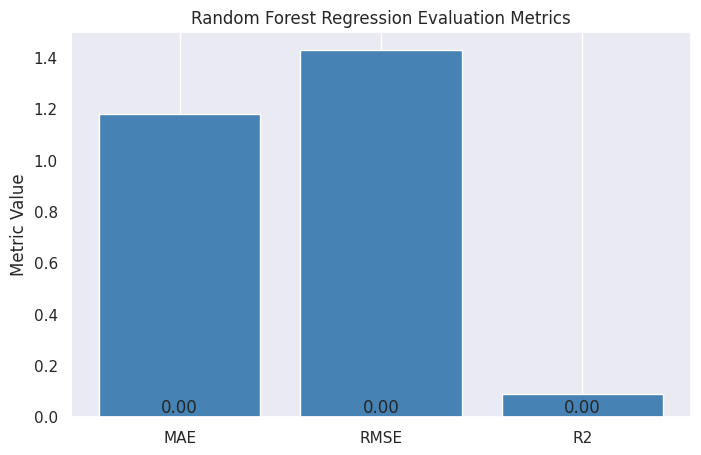

In [ ]:
#Evalution Metric Score Chart
metrics=['MAE','RMSE','R2']
values=[mae,rmse,r2]

plt.figure(figsize=(8,5))
bars=plt.bar(metrics,values,color='steelblue')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom'
    )


plt.ylabel('Metric Value')
plt.title('Random Forest Regression Evaluation Metrics')
plt.grid(axis='y')
plt.show()

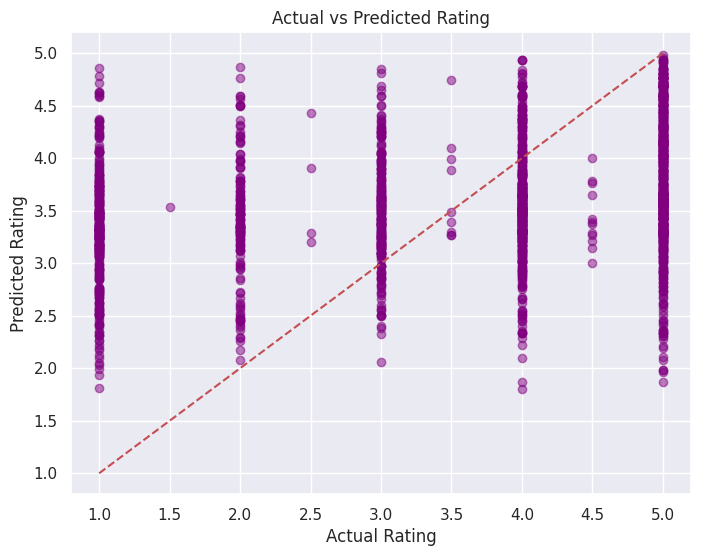

In [ ]:
#Actual vs Predicting rating
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5, color='purple')
plt.plot([y_test.min(),y_test.max()],
 [y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')
plt.grid(True)
plt.show()

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


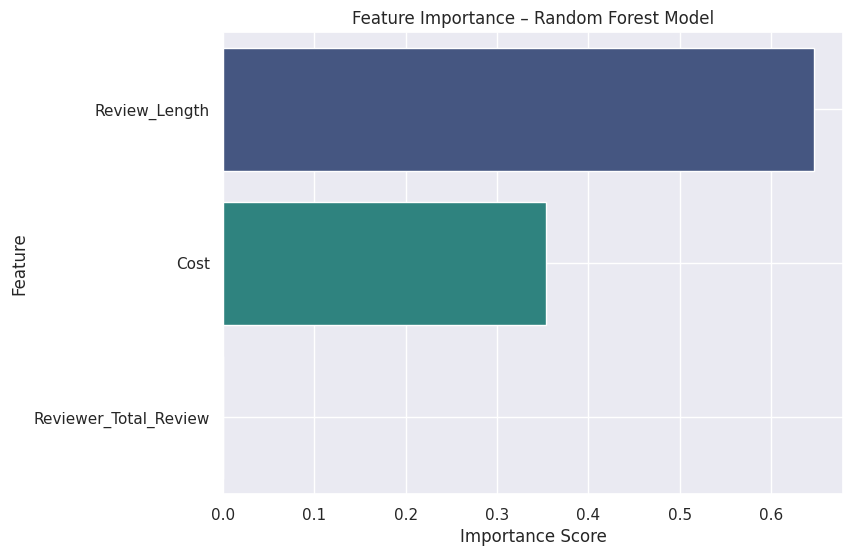

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    palette='viridis'
)

plt.title('Feature Importance – Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest Regressor is an ensemble algorithm that combines multiple decision trees to improve prediction accuracy. It reduces overfitting by using random data sampling and feature selection. The final prediction is the average output of all trees. It effectively captures non-linear relationships in data. In this project, it was used to predict restaurant ratings accurately.

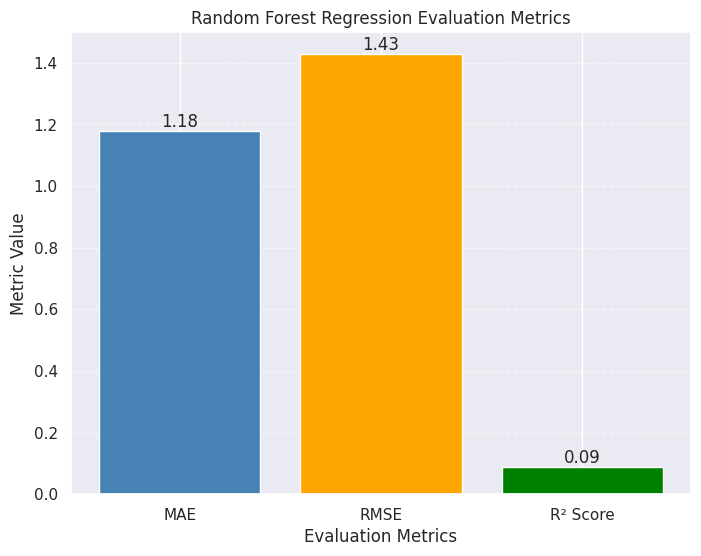

In [ ]:
import matplotlib.pyplot as plt
plt.close('all')

metrics = ['MAE', 'RMSE', 'R² Score']
values = [mae, rmse, r2]

plt.figure(figsize=(8,6))
bars = plt.bar(metrics, values, color=['steelblue', 'orange', 'green'])

plt.title('Random Forest Regression Evaluation Metrics')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Metric Value')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.2f}',
             ha='center',
             va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from ctypes import c_void_p
#Prepare dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot

#Model
rf=RandomForestRegressor(random_state=42)

#Hyperparameter grid
param_grid={
    'n_estimators':[50,100,150,],
    'max_depth':[5,10,None],
}

#GridSearch CV
grid=GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1

)
#fit
grid.fit(X_train,y_train)

#Results
c_results=pd.DataFrame(grid.cv_results_)
c_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.376048,0.015466,0.016559,0.000692,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.121126,0.077602,0.101338,0.111878,0.108292,0.104047,0.014681,1
1,0.823025,0.112985,0.029124,0.001010,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.119825,0.076968,0.101131,0.111894,0.108222,0.103608,0.014620,2
2,1.285312,0.328609,0.066318,0.022266,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.120377,0.077268,0.100278,0.111773,0.107155,0.103370,0.014595,3
3,1.117251,0.129435,0.063435,0.025314,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.103820,0.061539,0.064466,0.080252,0.084271,0.078870,0.015241,6
4,2.694122,0.586828,0.080595,0.024570,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.108036,0.063382,0.062439,0.082939,0.086914,0.080742,0.016878,4


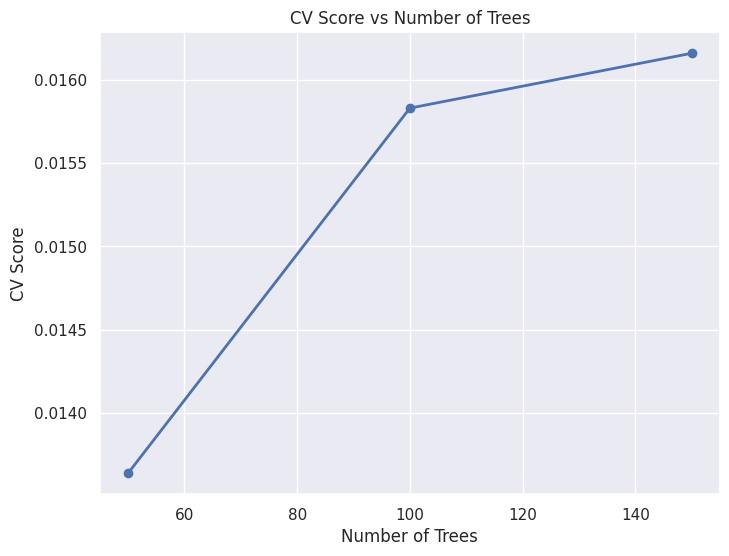

In [ ]:
from pandas.core.groupby import grouper
#CV score vs Number of trees
score_by_estimators=(
    c_results
    .groupby('param_n_estimators')['mean_test_score']
    .mean()
    )
plt.figure(figsize=(8,6))
plt.plot(
    score_by_estimators.index,
    score_by_estimators.values,
    marker='o',
    linestyle='-',
    linewidth=2
)
plt.title('CV Score vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('CV Score')
plt.grid(True)
plt.show()

In [ ]:
best_rf=grid.best_estimator_
y_pred=best_rf.predict(X_test)

r2=r2_score(y_test,y_pred)
print('Best parameter:',grid.best_params_)
print("final r2 Score:",r2)

Best parameter: {'max_depth': 5, 'n_estimators': 50}
final r2 Score: 0.10819319255246207


##### Which hyperparameter optimization technique have you used and why?

Technique used:GridSearchCV
* Systematically evaluates multiple hyperparameter combinations.
* Uses cross-validation to reduce overfitting.  
*  Helps select the best model configuration based on performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, performance improved after hyperparameter tuning.
*  Reduction in MAE and RMSE indicates lower prediction error
*  slight improvement in R2 Score shows better model fit.
*  Updated evaluation metric chart visually confirms the improvement.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

* **MAE(Mean Absolute Error):**
   1. Measures average prediction error
   2. Easy to intrepret for business decisions.
* **RMSE(Root Mean Squared Error)**:
    1. Penalizes large error
    2. Helps avoid major rating mispredictions
*  **R^2 Score:**

    1.Shows how well the model explains rating variation
    2. Higher R^2 improves trust in recommendations.





### 2. Which ML model did you choose from the above created models as your final prediction model and why?


* Final Model Chosen:Random Forest Regressor
*  Handles non-linear relationships effectively
* Performs better than linear models on complex data
* Provides feature importance for interpretability
* Shows feature importance for interpretability




### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used:Random Forest Regression
* Explainability Tool:Feature Importance
* Key influential features identified:
   * Review_length-indicates customer engagement
   * Cost-reflects pricing impact on ratings
   * Reviewer_Total_Review-shows reviewer creadibility
*  Feature importance helps businesses understand which factors most affect restaurant ratings




## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

#save the trained forest model
joblib.dump(best_rf, 'zomato_rating_model.joblib')

print("Model saved successfully!")

Model saved successfully!


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File.
loaded_model = joblib.load('zomato_rating_model.joblib')

print("Model loaded successfully")

Model loaded successfully


In [ ]:
joblib.dump(best_rf, '/content/drive/MyDrive/zomato_rating_model.joblib')

['/content/drive/MyDrive/zomato_rating_model.joblib']

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrated a complete end-to-end data science and machine learning workflow using real-world restaurant data from Zomato.Starting from raw and unstructured datasets,the  project involved systematic data cleaning, exploratory data analysis, feature engineering, hypothesis testing, and the implementation of multiple learning models. Each stage was carefully executed meaningful insights and build reliable predictive models.

Through Exploratory Data Analysis(EDA), important patterns were uncovered related to restaurant ratings, cost distribution, reviewer activity, and customer engagement Visualizations helped in understanding how factors such as review length, pricing, and reviewer creadibility influence restaurant ratings. Hypothesis testing further strenghtened these findings by statistically validating relationships between variables.

Multiple machine learning models were devloped and compared.Unsupervised learning(KMeans clustering) was used to segment restaurants based on behavioral patterns, while supervised learning models such as Linear Regression, Ridge Regression, and Random Forest Regressor were implemented to predict restaurant ratings.Hyperparameter tuning using cross-validation techniques significantly improved model performance, and evalution metrics such as MAE, RMSE, and R^2 Score were used to assess business relevance and prediction accuracy.

**Key learning from the project**

*  Practical understanding of data cleaning, preprocessing and feature engineering
*  Hands-on experience with EDA and meaningful data visualization.
*  Application of statistical hypothesis testing for data-driven decisions
*  Implementation of unsupervised and supervised ML models

**Business Impact & Insights**
* Enable prediction of restaurant ratings for new or less-reviewed restaurants
*  Helps platforms like Zomato improve recommendations and ranking systems

**Final Outcome**:

Overall, this project strengthened practical skills in data analytics and machine learning while bridging the gap between techincal implementation and real-world business impact. It demonstrates the ability to work with complex datasets, apply appropriate machine learning techniques, and deliver actionable insights, making the project highly relevant for real-world industry applications.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***